# **Exploratory Data Analysis**

### Librerías

In [ ]:
"""Librerías que pueden ser necesarias"""

# Manejo de datos
import pandas as pd                 # Análisis y manipulación de datos en tablas
import numpy as np                  # Cálculos numéricos y matrices
import os                           # Gestión de rutas de archivos

# Visualización de datos
import matplotlib.pyplot as plt     # Gráficos básicos en 2D
import seaborn as sns               # Gráficos estadísticos mejorados
import plotly.express as px         # Gráficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gráficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualización de diagramas de "treemap"

import warnings
warnings.filterwarnings("ignore")   #ignorar advertencias

### Carga de datos

In [2]:
df = pd.read_csv("../Data/df_original_250526.csv")
df.head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,3,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,4,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,5,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


## **1. Descripción general de los datos**

Campaña de marketing de un banco portugués para predecir si un cliente se subscribirá a un plazo fijo.

Promoción de plazos fijos por llamada telefónica.

- Filas: 26188 clientes
- Columnas:
    - **'id', 'age', 'job', 'marital', 'education'**: id, edad, tipo de empleo, estado civil, nivel educativo → **Características personales del cliente**
    - **'default', 'balance', 'housing', 'loan'**: impagos, saldo medio anual, hipoteca, préstamos → **Características de las finanzas del cliente**
    - **'contact', 'day', 'month', 'duration', 'campaign'**: tipo de llamada, día, mes, duración de la llamada y número de contactos→ **Características del contacto realizado al cliente en la campaña actual**
    - **'pdays', 'previous', 'poutcome'**: días desde el último contacto, número de contactos en campañas anteriores, resultado de campaña anterior → **Características campañas anteriores**
    - **'deposit'**: resultado de la campaña actual → **Objetivo**

Información extraída:
- **Age**: 0 - 95 años. 13 nulos
- **Balance**: -6847 - 81204 €
- **Day**: 1 - 31 (días del mes)
- **Duration**: 2 - 3881 s de llamada
- **Campaign**: entre 1 y 63 contactos por cliente en esta campaña
- **Pdays**: -1 sin contacto previo. Entre -1 - 854 días del último contacto en esta campaña
- **Previous**: entre 0 - 58 contactos en campañas anteriores

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26188 entries, 0 to 26187
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         26188 non-null  int64  
 1   age        26170 non-null  float64
 2   job        26188 non-null  object 
 3   marital    26173 non-null  object 
 4   education  26172 non-null  object 
 5   default    26173 non-null  object 
 6   balance    26188 non-null  int64  
 7   housing    26111 non-null  object 
 8   loan       26188 non-null  object 
 9   contact    26188 non-null  object 
 10  day        26188 non-null  int64  
 11  month      26188 non-null  object 
 12  duration   26188 non-null  int64  
 13  campaign   26188 non-null  int64  
 14  pdays      26188 non-null  int64  
 15  previous   26188 non-null  int64  
 16  poutcome   26188 non-null  object 
 17  deposit    26188 non-null  object 
dtypes: float64(1), int64(7), object(10)
memory usage: 3.6+ MB


1 float → cambiar age a int

7 int → id y day son en realidad texto, solo 5 numéricas

10 object → 9 variables categóricas + deposit

In [4]:
df.shape       # (filas, columnas)



(26188, 18)

In [5]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,26188.000000,26170.000000,26188.000000,26188.000000,26188.000000,26188.000000,26188.000000,26188.000000
mean,13166.550901,41.203974,1507.571598,15.640599,374.745418,2.513365,51.920612,0.836834
std,7641.813298,11.923648,3135.392028,8.429209,351.033919,2.779620,109.383198,2.300868
min,1.000000,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,6543.750000,32.000000,120.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,13086.500000,39.000000,541.500000,15.000000,256.000000,2.000000,-1.000000,0.000000
75%,19840.250000,49.000000,1679.500000,22.000000,502.000000,3.000000,36.250000,1.000000
max,26383.000000,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
df.isnull().sum()

id            0
age          18
job           0
marital      15
education    16
default      15
balance       0
housing      77
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

## **2. Análisis univariado**

### Características personales

##### Age

<Axes: >

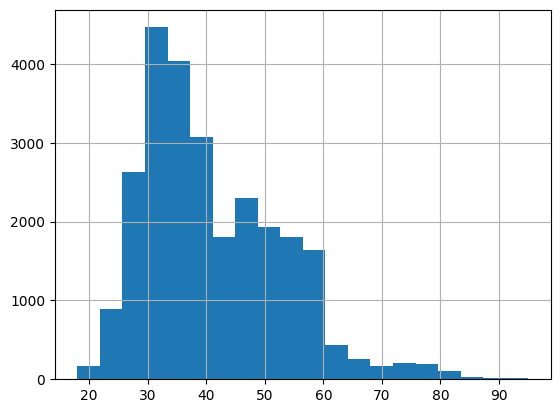

In [7]:
df['age'].hist(bins=20)

count    26170.000000
mean        41.203974
std         11.923648
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64


<Axes: >

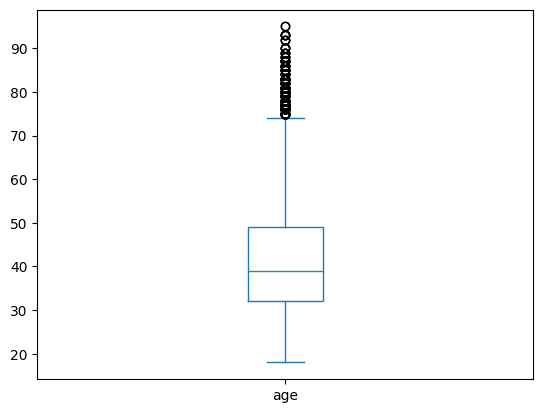

In [8]:
print(df['age'].describe())
df['age'].plot.box()

##### Job

job
management       6039
blue-collar      4570
technician       4285
admin.           3148
services         2123
retired          1845
self-employed     936
student           842
unemployed        822
entrepreneur      767
housemaid         642
unknown           169
Name: count, dtype: int64


<Axes: xlabel='job'>

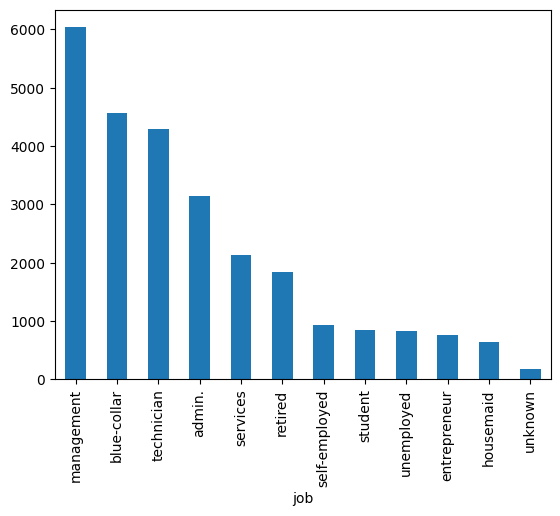

In [9]:
print(df['job'].value_counts())
df['job'].value_counts().plot(kind='bar', rot=90)

##### Marital

marital
married     14847
single       8310
divorced     3016
Name: count, dtype: int64


<Axes: xlabel='marital'>

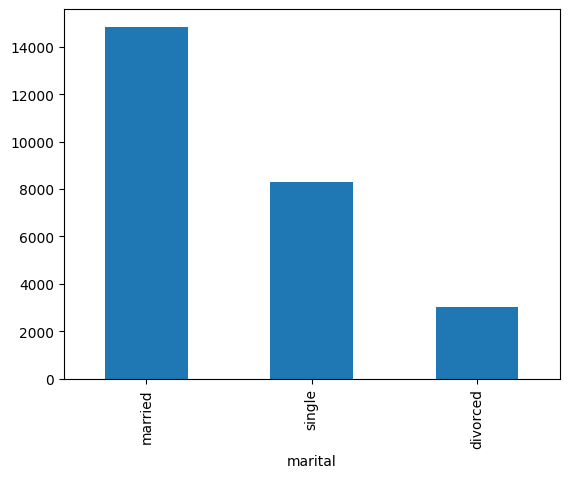

In [10]:
print(df['marital'].value_counts())
df['marital'].value_counts().plot(kind='bar', rot=90)

##### Education

education
secondary    12796
tertiary      8669
primary       3579
unknown       1128
Name: count, dtype: int64


<Axes: xlabel='education'>

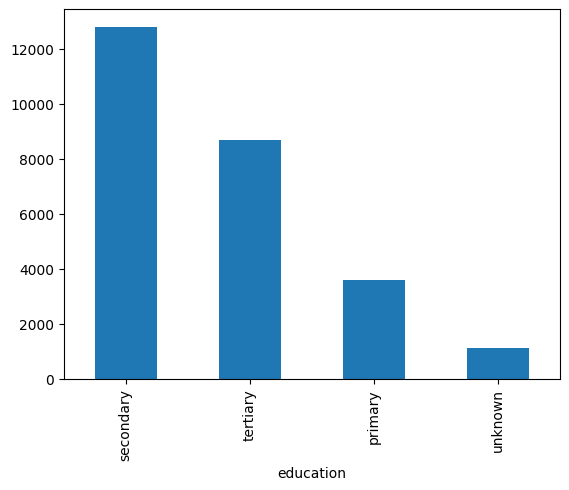

In [11]:
print(df['education'].value_counts())
df['education'].value_counts().plot(kind='bar', rot=90)

### Características de finanzas

##### Default

default
no     25780
yes      393
Name: count, dtype: int64


<Axes: ylabel='count'>

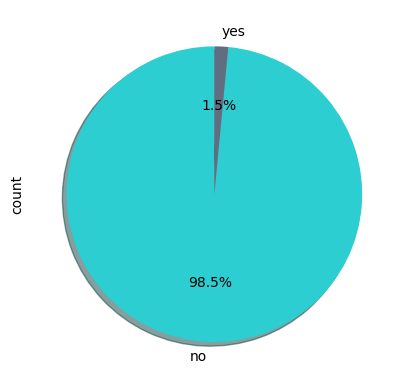

In [12]:
print(df['default'].value_counts())
df['default'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, shadow=True, colors=["#2CCED1", "#5F6F81"]
)

##### Balance

<Axes: >

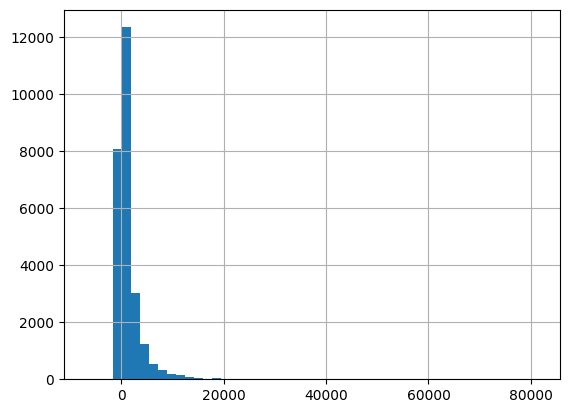

In [13]:
df['balance'].hist(bins=50)

count    26188.000000
mean      1507.571598
std       3135.392028
min      -6847.000000
25%        120.000000
50%        541.500000
75%       1679.500000
max      81204.000000
Name: balance, dtype: float64


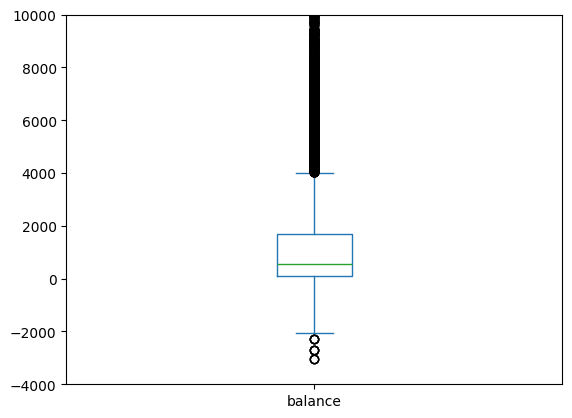

In [14]:
print(df['balance'].describe())
df['balance'].plot.box()
plt.ylim(-4000, 10000)
plt.show()

##### Housing

housing
no     13676
yes    12435
Name: count, dtype: int64


<Axes: ylabel='count'>

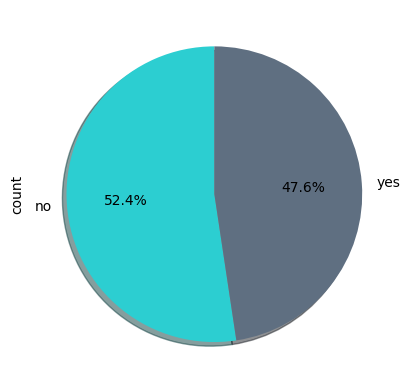

In [15]:
print(df['housing'].value_counts())
df['housing'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, shadow=True, colors=["#2CCED1", "#5F6F81"]
)

##### Loan

loan
no     22754
yes     3434
Name: count, dtype: int64


<Axes: ylabel='count'>

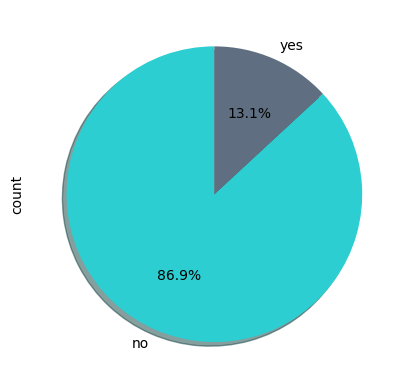

In [16]:
print(df['loan'].value_counts())
df['loan'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, shadow=True, colors=["#2CCED1", "#5F6F81"]
)

### Características contactos en campaña actual

##### Contact

contact
cellular     18885
unknown       5469
telephone     1834
Name: count, dtype: int64


<Axes: ylabel='contact'>

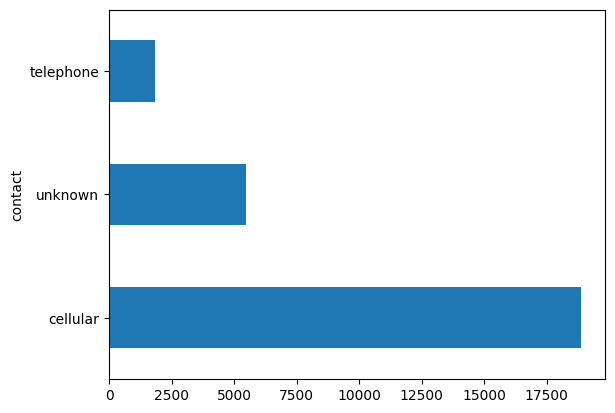

In [17]:
print(df['contact'].value_counts())
df['contact'].value_counts().plot(kind='barh')

##### Day

day
1      280
2      814
3      708
4      967
5     1117
6     1064
7      885
8     1000
9      828
10     381
11     893
12    1015
13    1060
14    1099
15    1051
16     845
17     993
18    1320
19     874
20    1328
21    1068
22     628
23     557
24     283
25     549
26     599
27     678
28     990
29     890
30    1117
31     307
Name: count, dtype: int64


<Axes: ylabel='day'>

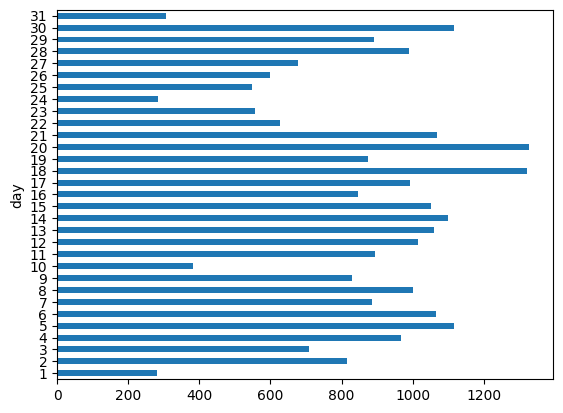

In [18]:
print(df['day'].value_counts().sort_index())
df['day'].value_counts().sort_index().plot(kind='barh', rot=0)

##### Month

month
jan     796
feb    1813
mar     653
apr    2184
may    6667
jun    2845
jul    3549
aug    3555
sep     761
oct     912
nov    2197
dec     256
Name: count, dtype: int64


<Axes: ylabel='month'>

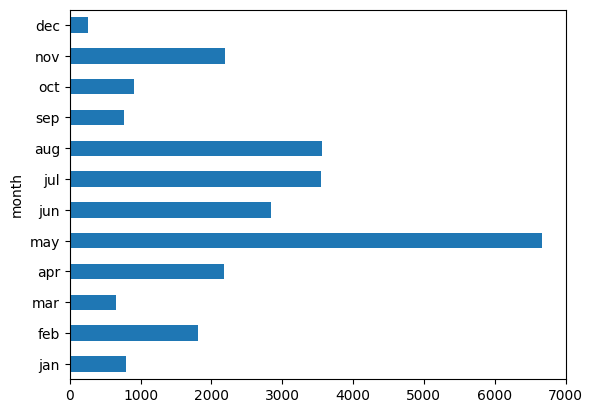

In [19]:
orden_meses = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
print(df['month'].value_counts().reindex(orden_meses))
df['month'].value_counts().reindex(orden_meses).plot(kind='barh')

##### Duration

<Axes: >

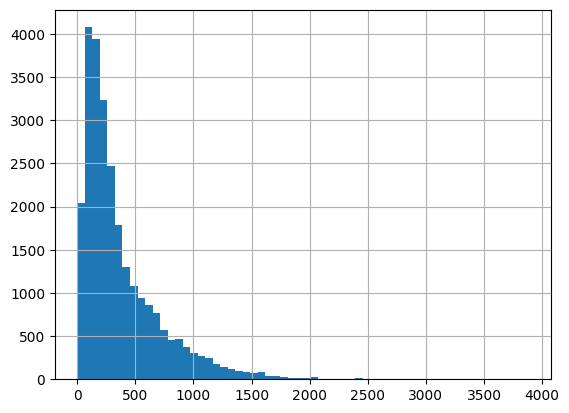

In [20]:
df['duration'].hist(bins=60)

count    26188.000000
mean       374.745418
std        351.033919
min          2.000000
25%        138.000000
50%        256.000000
75%        502.000000
max       3881.000000
Name: duration, dtype: float64


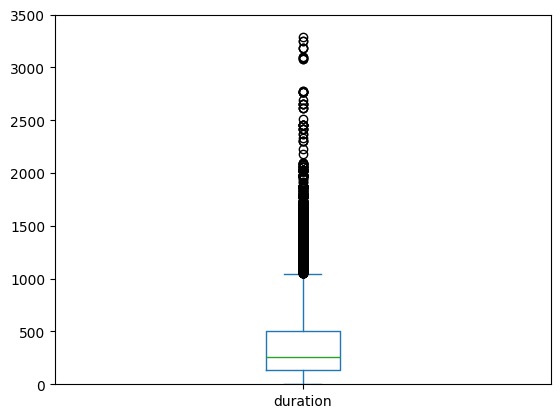

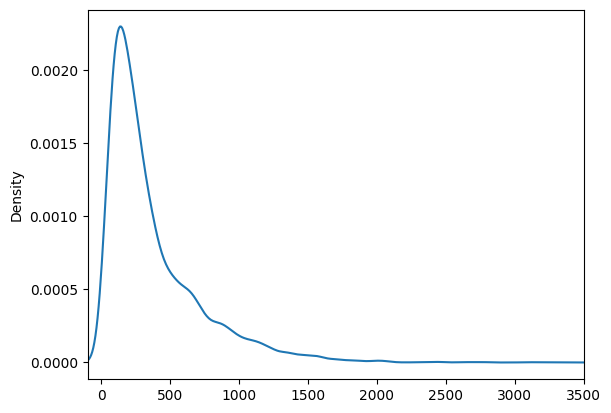

In [21]:
print(df['duration'].describe())
df['duration'].plot.box()
plt.ylim(0, 3500)
plt.show()
df['duration'].plot.kde()
plt.xlim(-100, 3500)
plt.show()

##### Campaign

<Axes: >

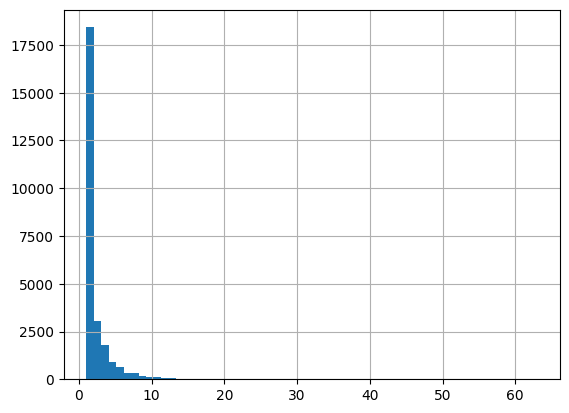

In [22]:
df['campaign'].hist(bins=60)

count    26188.000000
mean         2.513365
std          2.779620
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64
campaign
1     11268
2      7158
3      3046
4      1784
5       882
6       623
7       331
8       305
9       174
10      123
11      102
13       70
12       64
14       38
15       32
17       28
21       19
16       19
30       14
19       13
18       10
26        9
25        9
23        9
22        8
20        8
24        8
43        8
29        6
32        4
41        4
27        3
28        3
63        2
33        2
31        2
Name: count, dtype: int64


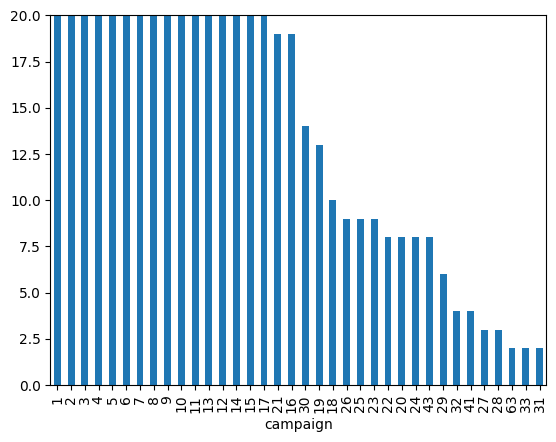

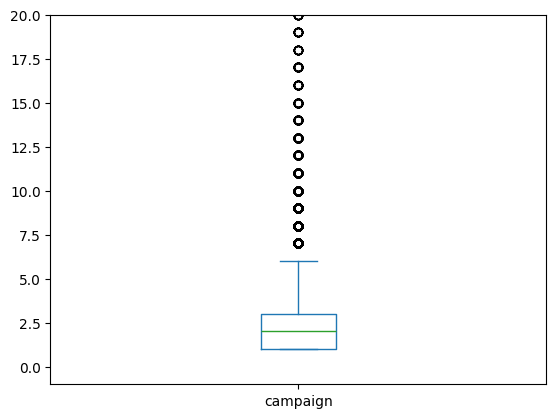

In [23]:

print(df['campaign'].describe())
print(df['campaign'].value_counts())
df['campaign'].value_counts().plot(kind='bar', rot=90)
plt.ylim(0, 20)
plt.show()
df['campaign'].plot.box()
plt.ylim(-1, 20)
plt.show()

### Características campañas anteriores

##### Pdays

<Axes: >

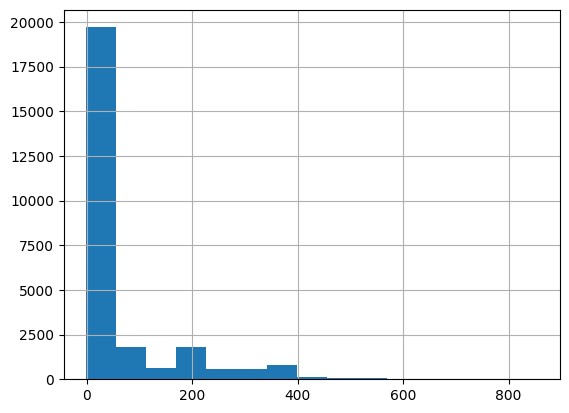

In [24]:
df['pdays'].hist(bins=15)

count    26188.000000
mean        51.920612
std        109.383198
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         36.250000
max        854.000000
Name: pdays, dtype: float64


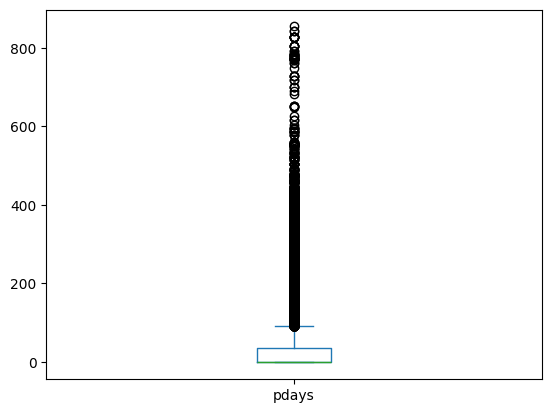

In [25]:
print(df['pdays'].describe())
df['pdays'].plot.box()

plt.show()

##### Previous

<Axes: >

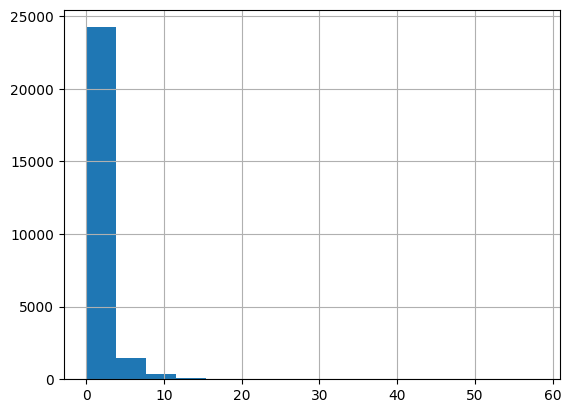

In [26]:
df['previous'].hist(bins=15)

count    26188.000000
mean         0.836834
std          2.300868
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         58.000000
Name: previous, dtype: float64


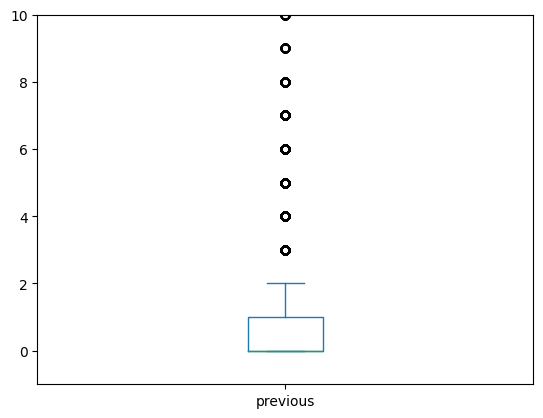

In [27]:
print(df['previous'].describe())
df['previous'].plot.box()
plt.ylim(-1, 10)
plt.show()

##### Poutcome

poutcome
unknown    19490
failure     2874
success     2538
other       1286
Name: count, dtype: int64


<Axes: ylabel='poutcome'>

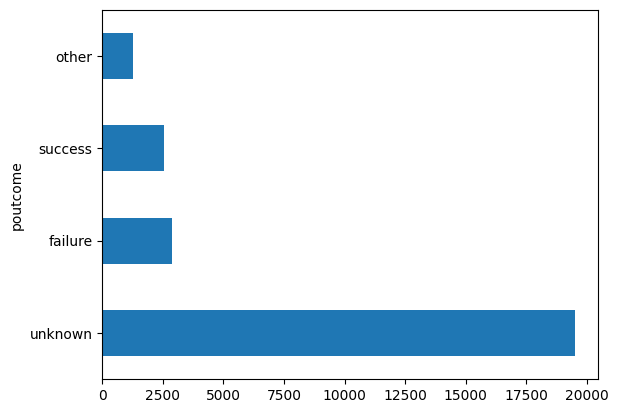

In [28]:
print(df['poutcome'].value_counts())
df['poutcome'].value_counts().plot(kind='barh', rot=0)

### Objetivo

##### Deposit

deposit
no     13685
yes    12503
Name: count, dtype: int64


<Axes: xlabel='deposit'>

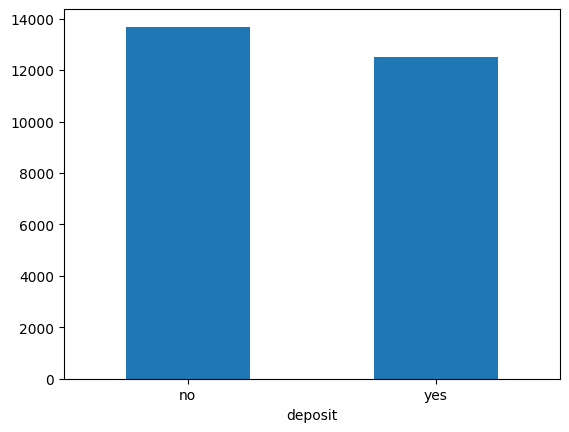

In [29]:
print(df['deposit'].value_counts())
df['deposit'].value_counts().plot(kind='bar', rot=0)

### Variables numéricas

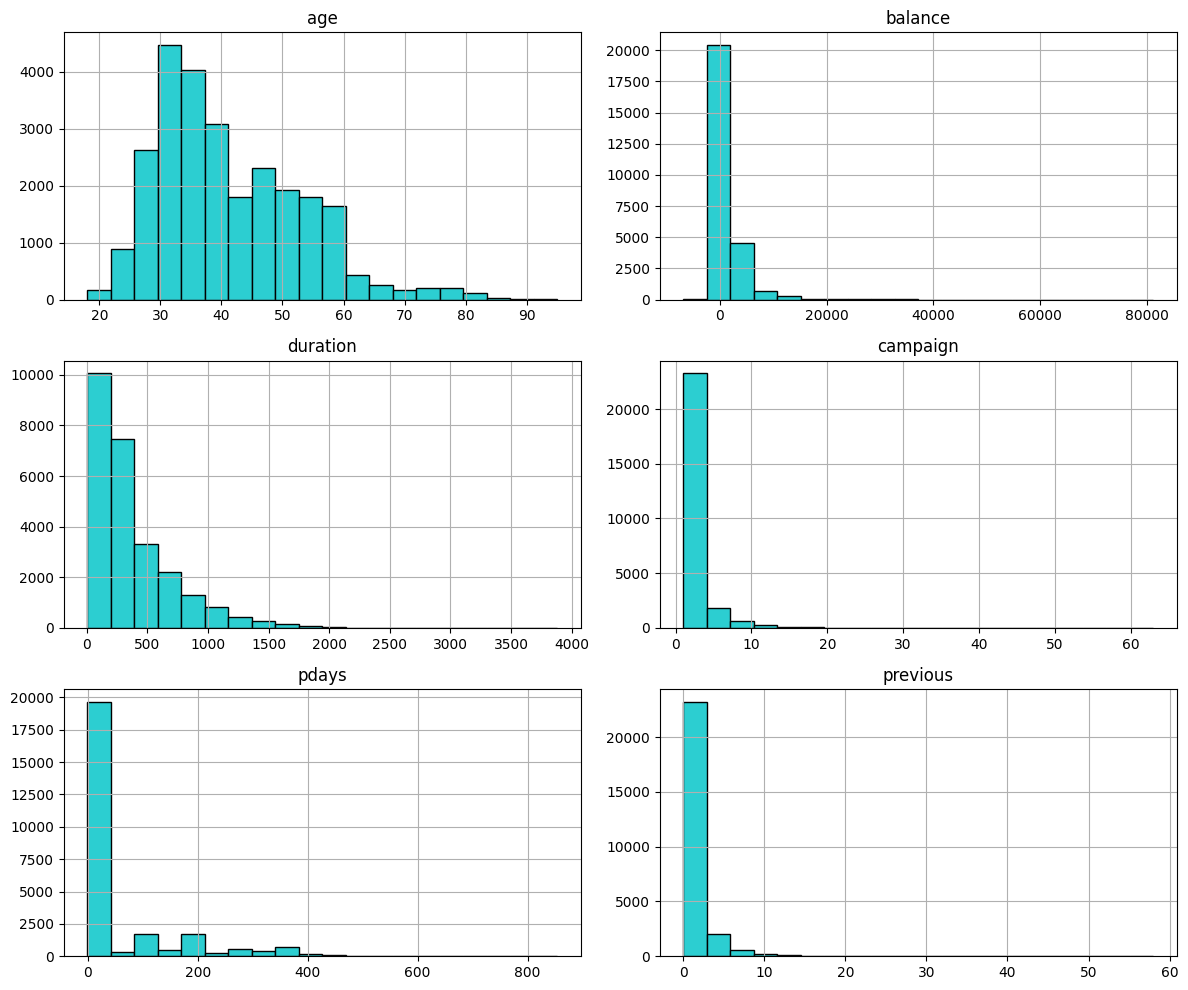

In [30]:
# Histogramas de todas las variables numéricas
numericas = df.select_dtypes(include='number').columns
numericas = numericas.drop(['id', 'day'])

df[numericas].hist(bins=20, figsize=(12, 10), edgecolor='black',color='#2CCED1')
plt.tight_layout()
plt.show()

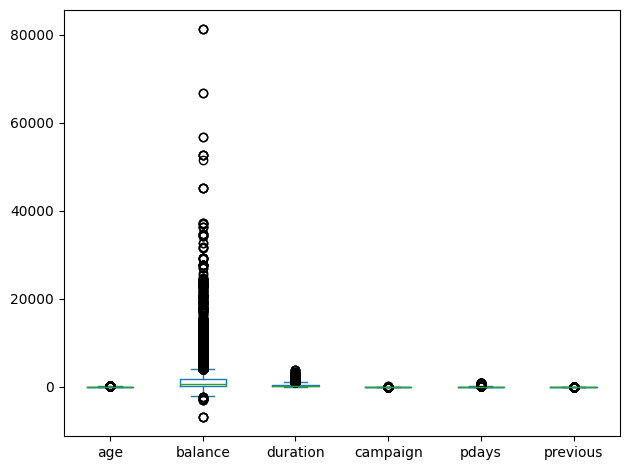

In [31]:
# Boxplots de variables numéricas
df[numericas].plot.box()
plt.tight_layout()
plt.show()

## **3. Análisis bivariado**

### Características personales

##### Age - deposit

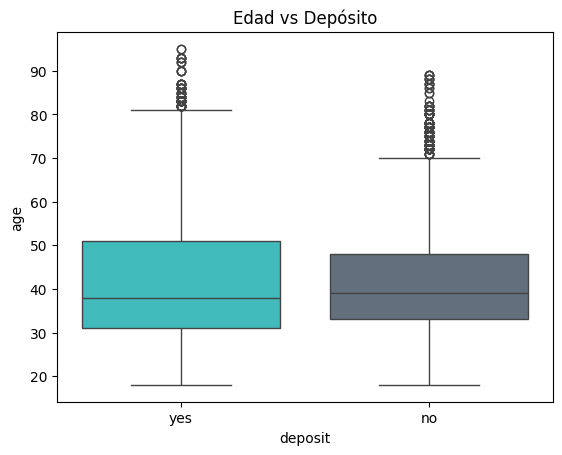

In [32]:
sns.boxplot(data=df, x='deposit', y='age', hue='deposit', palette=['#2CCED1', '#5F6F81'])
plt.title('Edad vs Depósito')
plt.show()

##### Job - deposit

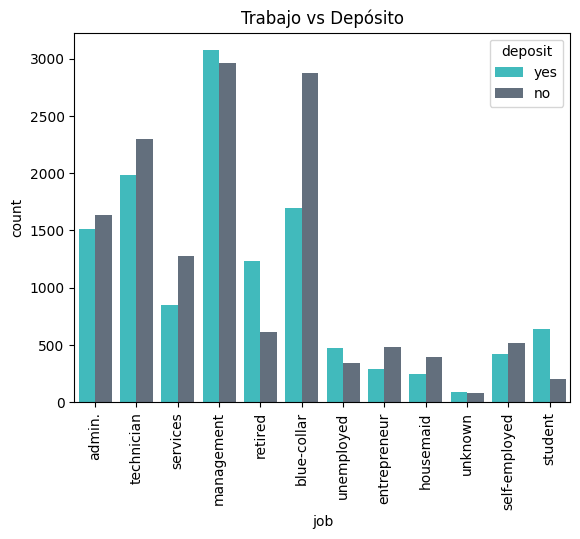

In [33]:
sns.countplot(data=df, x='job', hue='deposit',palette=['#2CCED1', '#5F6F81'])
plt.title('Trabajo vs Depósito')
plt.xticks(rotation=90)
plt.show()

##### Marital - deposit

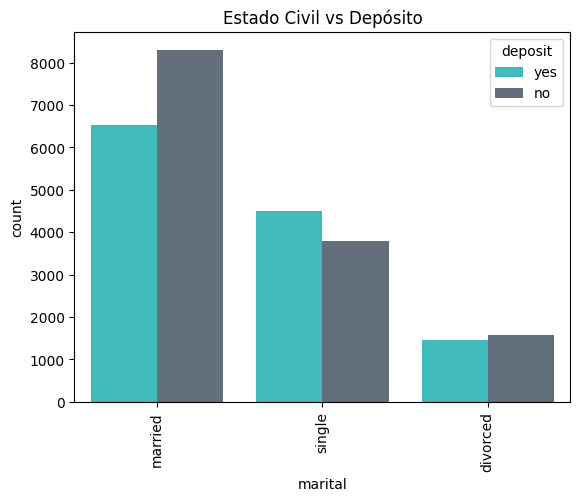

In [34]:
sns.countplot(data=df, x='marital', hue='deposit', palette=['#2CCED1', '#5F6F81'])
plt.title('Estado Civil vs Depósito')
plt.xticks(rotation=90)
plt.show()

##### Education - deposit

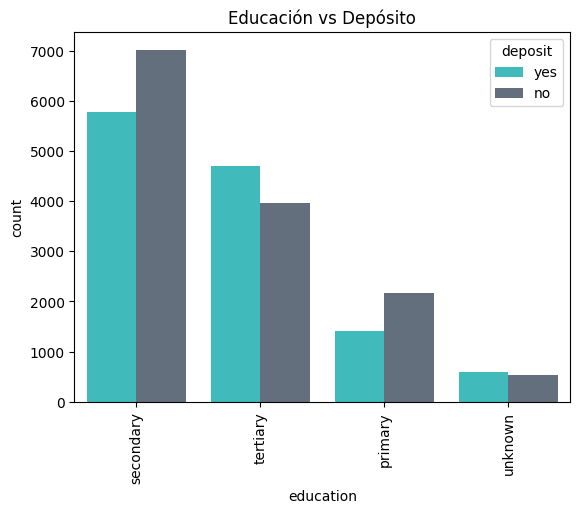

In [35]:
sns.countplot(data=df, x='education', hue='deposit',palette=['#2CCED1', '#5F6F81'])
plt.title('Educación vs Depósito')
plt.xticks(rotation=90)
plt.show()

### Características de finanzas

##### Default (impagos) - deposit

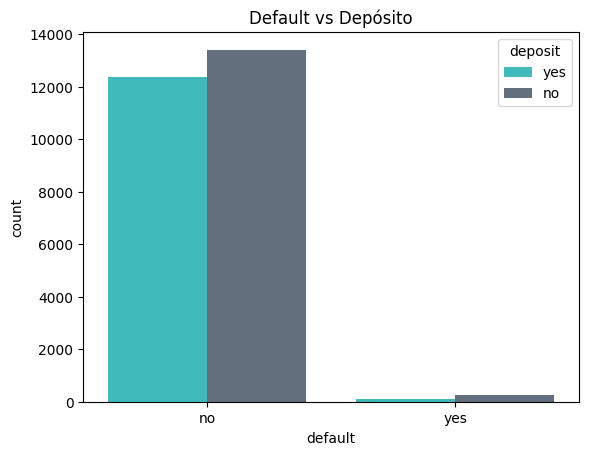

In [36]:
sns.countplot(data=df, x='default', hue='deposit', palette=['#2CCED1', '#5F6F81'])
plt.title('Default vs Depósito')    
plt.show()


##### Balance - deposit

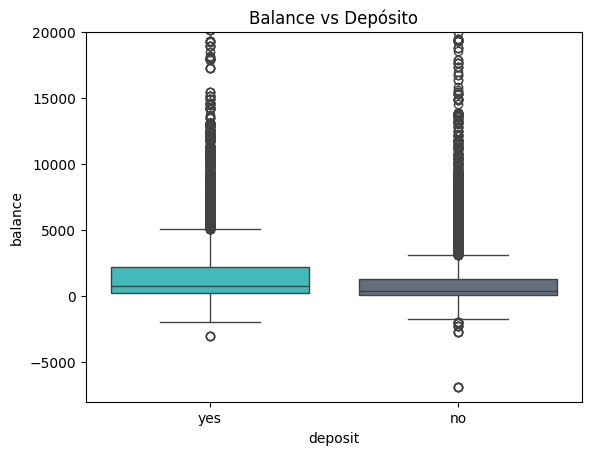

In [37]:
sns.boxplot(data=df, x='deposit', y='balance', hue='deposit',palette=['#2CCED1', '#5F6F81'])
plt.title('Balance vs Depósito')
plt.ylim(-8000, 20000)
plt.show()

##### Housing - deposit

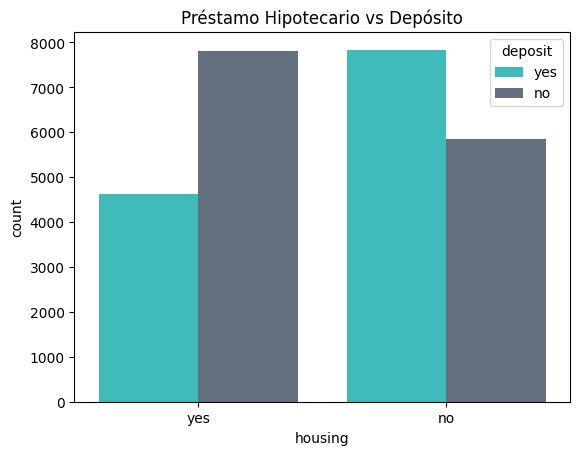

In [38]:
sns.countplot(data=df, x='housing', hue='deposit',palette=['#2CCED1', '#5F6F81'])
plt.title('Préstamo Hipotecario vs Depósito')   
plt.show()

##### Loan - deposit

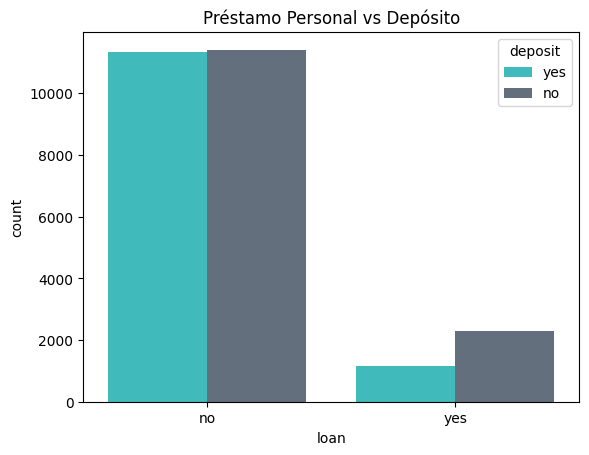

In [39]:
sns.countplot(data=df, x='loan', hue='deposit',palette=['#2CCED1', '#5F6F81'])
plt.title('Préstamo Personal vs Depósito')  
plt.show()

### Características contactos en campaña actual

##### Contact - deposit

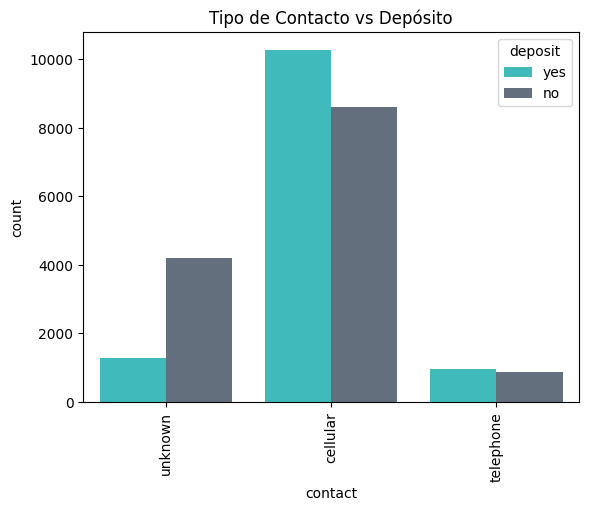

In [40]:
sns.countplot(data=df, x='contact', hue='deposit', palette=['#2CCED1', '#5F6F81'])
plt.title('Tipo de Contacto vs Depósito')
plt.xticks(rotation=90)
plt.show()

##### Day - deposit

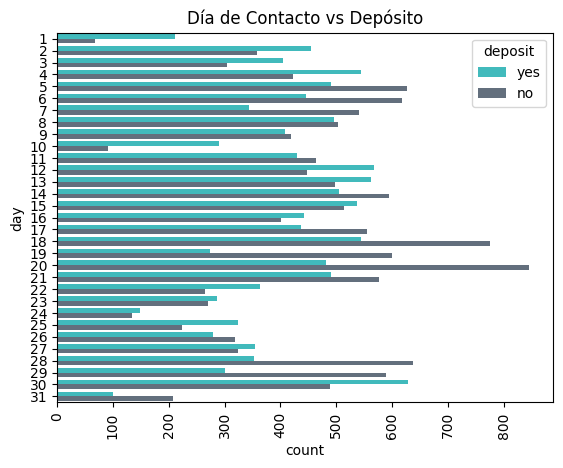

In [41]:
sns.countplot(data=df, y='day', hue='deposit',palette=['#2CCED1', '#5F6F81'])
plt.title('Día de Contacto vs Depósito')        
plt.xticks(rotation=90)
plt.show()

##### Month - deposit

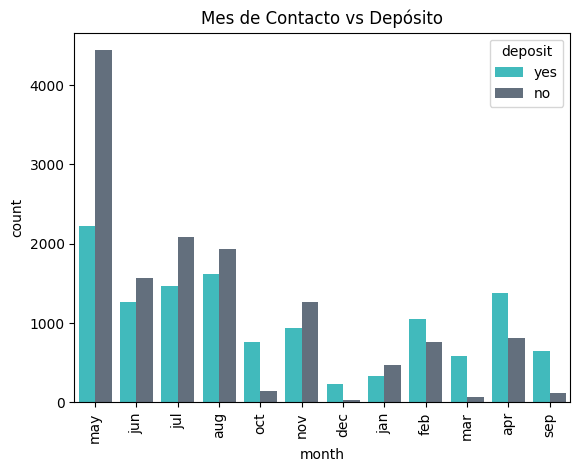

In [42]:
sns.countplot(data=df, x='month', hue='deposit',palette=['#2CCED1', '#5F6F81'])
plt.title('Mes de Contacto vs Depósito')    
plt.xticks(rotation=90)
plt.show()

##### Duration - deposit

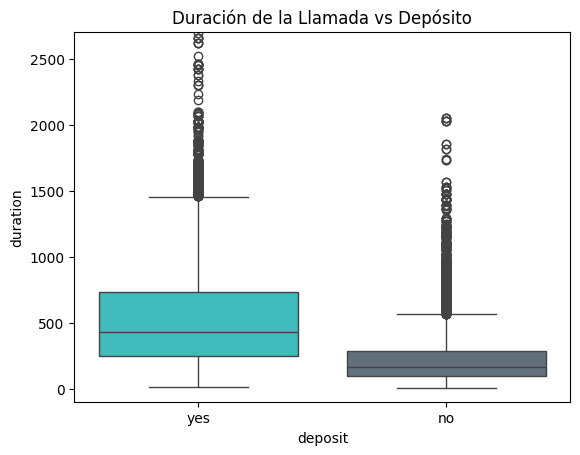

In [43]:
sns.boxplot(data=df, x='deposit', y='duration', hue='deposit', palette=['#2CCED1', '#5F6F81'])
plt.title('Duración de la Llamada vs Depósito') 
plt.ylim(-100, 2700)
plt.show()

##### Campaign - deposito

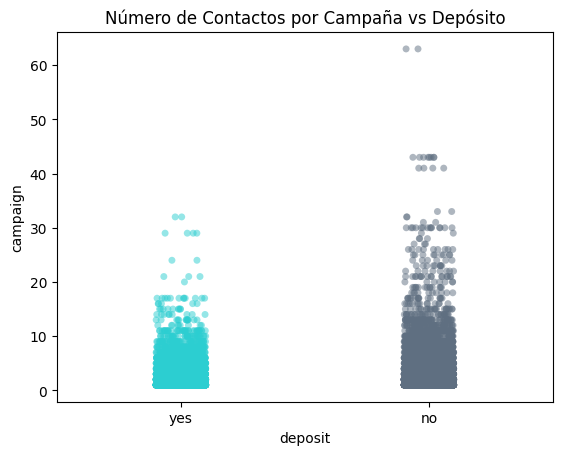

In [44]:


sns.stripplot(data=df, x='deposit', y='campaign', palette=['#2CCED1', '#5F6F81'], jitter=True, alpha=0.5)
plt.title('Número de Contactos por Campaña vs Depósito')
plt.show()


### Características campañas anteriores

##### Pdays - deposit

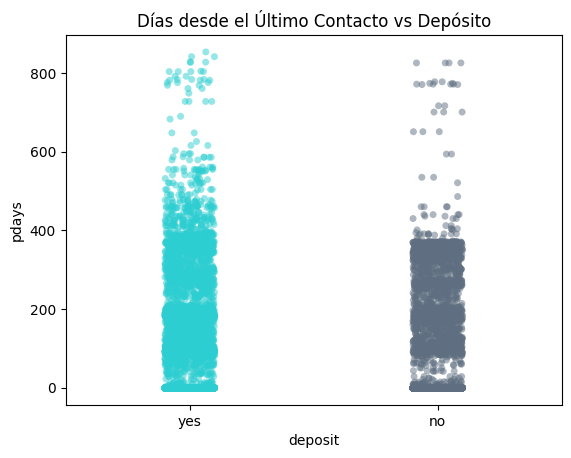

In [45]:
sns.stripplot(data=df, x='deposit', y='pdays', palette=['#2CCED1', '#5F6F81'], jitter=True, alpha=0.5)
plt.title('Días desde el Último Contacto vs Depósito')  

plt.show()

##### Previous - deposit

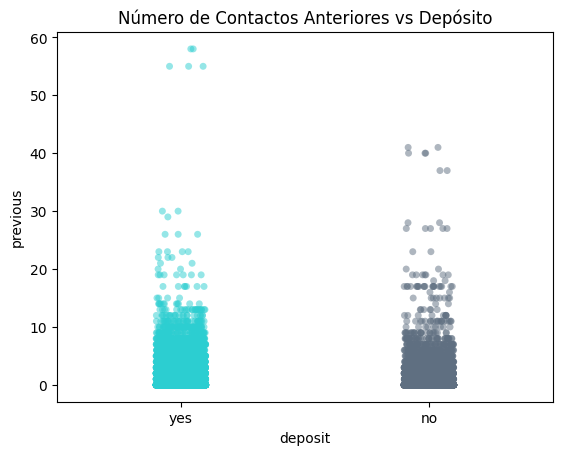

In [46]:
sns.stripplot(data=df, x='deposit', y='previous', palette=['#2CCED1', '#5F6F81'], jitter=True, alpha=0.5)
plt.title('Número de Contactos Anteriores vs Depósito')
plt.show()

##### Poutcome - deposit

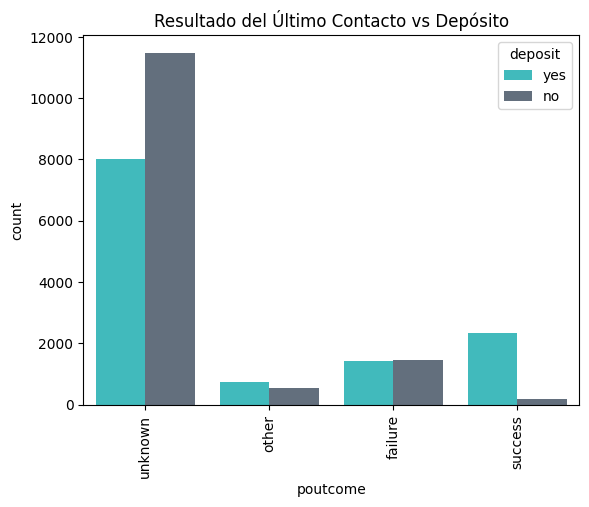

In [47]:
sns.countplot(data=df, x='poutcome', hue='deposit',palette=['#2CCED1', '#5F6F81'])
plt.title('Resultado del Último Contacto vs Depósito')
plt.xticks(rotation=90)
plt.show()

## **4. Correlación entre las variables numéricas**

                id       age   balance       day  duration  campaign  \
id        1.000000 -0.001948 -0.012605  0.006801 -0.077594  0.021009   
age      -0.001948  1.000000  0.108323 -0.006456 -0.000122 -0.010021   
balance  -0.012605  0.108323  1.000000  0.008193  0.025562 -0.022432   
day       0.006801 -0.006456  0.008193  1.000000 -0.022053  0.134708   
duration -0.077594 -0.000122  0.025562 -0.022053  1.000000 -0.041796   
campaign  0.021009 -0.010021 -0.022432  0.134708 -0.041796  1.000000   
pdays    -0.007929  0.006747  0.019771 -0.080479 -0.034004 -0.101331   
previous -0.013832  0.021896  0.033506 -0.060472 -0.037683 -0.048307   

             pdays  previous  
id       -0.007929 -0.013832  
age       0.006747  0.021896  
balance   0.019771  0.033506  
day      -0.080479 -0.060472  
duration -0.034004 -0.037683  
campaign -0.101331 -0.048307  
pdays     1.000000  0.510290  
previous  0.510290  1.000000  


<Axes: >

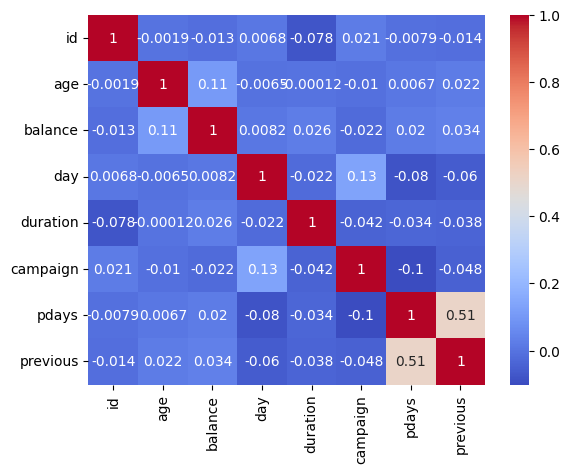

In [48]:
numericas = df.select_dtypes(include='number')
print(numericas.corr())
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm')

La única correlación significativa se da entre pdays y previous, pero no tiene sentido ya que "repiten" información (si se contactó a un cliente hace poco días, es más probable que haya un contacto previo). No tiene mucho sentido comparar las variables numéricas entre ellas.

##### Comparar numéricas con deposit
- Convertir deposit a 1 / 0.

               age   balance  duration  campaign     pdays  previous   deposit
age       1.000000  0.108323 -0.000122 -0.010021  0.006747  0.021896  0.037860
balance   0.108323  1.000000  0.025562 -0.022432  0.019771  0.033506  0.088627
duration -0.000122  0.025562  1.000000 -0.041796 -0.034004 -0.037683  0.453383
campaign -0.010021 -0.022432 -0.041796  1.000000 -0.101331 -0.048307 -0.127937
pdays     0.006747  0.019771 -0.034004 -0.101331  1.000000  0.510290  0.146426
previous  0.021896  0.033506 -0.037683 -0.048307  0.510290  1.000000  0.139721
deposit   0.037860  0.088627  0.453383 -0.127937  0.146426  0.139721  1.000000


<Axes: >

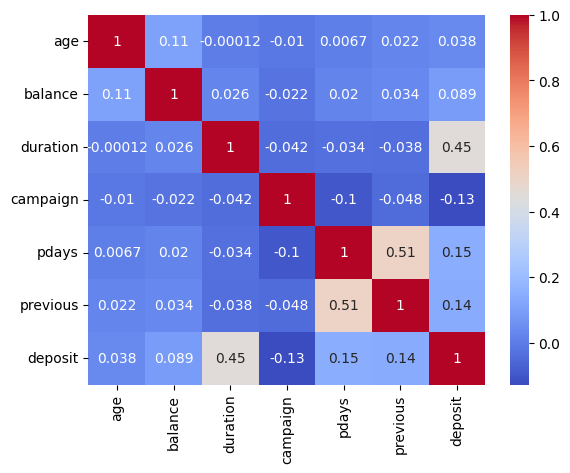

In [49]:
df_copy = df.copy()
df_copy['deposit'] = df_copy['deposit'].map({'yes': 1, 'no': 0})

numericas = df_copy.select_dtypes(include='number').drop(columns=['id', 'day'])
print(numericas.corr())

sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm')

Si nos fijamos solo en la correlación de cada variable con `deposit`, vemos que `duration` presenta una correlacón de **0.45**.
> Cuanto más dura la llamada, más probable es que el cliente acepte el depósito.